In [1]:
%matplotlib notebook  

In [2]:
#!nvidia-smi

In [3]:
import matplotlib.pyplot as plt
import h5py
import math

# Python 3 standard library
from pathlib import Path

##from torchsummary import summary
from model.plots import dual_train_plots_tracks_to_KDE

In [4]:
epoch = 1 
epochs = []
costs = []
vals = []

In [5]:
# -----------------------------------
# ADD THE STATS FROM MIKE's TRAINING 
# -----------------------------------
mike_root_dir = "ML/"
mike_l_input_dirs = []

mike_l_input_dirs.append("16Jan2021_TracksToKDE_DDplusplus_loss_Ba_iter1_floatAll_300epochs_1em4_4xwill")
mike_l_input_dirs.append("18Jan_DDplus_loss_Ba_iter8_floatAll_100epochs_1em5_4xwill")
mike_l_input_dirs.append("19Jan_DDplus_loss_Ba_iter9_floatAll_75epochs_1em5_4xwill")
mike_l_input_dirs.append("20Jan_DDplus_loss_Ba_iter10_floatAll_75epochs_1em5_4xwill")
mike_l_input_dirs.append("20Jan_DDplus_loss_Ba_iter11_floatAll_100epochs_1em5_4xwill")
mike_l_input_dirs.append("21Jan_DDplus_loss_Ba_iter12_floatAll_10epochs_1em5_4xwill")
mike_l_input_dirs.append("21Jan_DDplus_loss_Ba_iter13_floatAll_60epochs_1p5em5_4xwill")
mike_l_input_dirs.append("22Jan_DDplus_loss_Ba_iter14_floatAll_60epochs_1p5em5_4xwill")
mike_l_input_dirs.append("22Jan_DDplus_loss_Ba_iter15_floatAll_100epochs_1p5em5_4xwill")
mike_l_input_dirs.append("23Jan_DDplus_loss_Ba_iter16_floatAll_150epochs_1p5em5_4xwill")
mike_l_input_dirs.append("24Jan_DDplus_loss_Ba_iter17_floatAll_150epochs_1p5em5_4xwill")
mike_l_input_dirs.append("25Jan_DDplus_loss_Ba_iter18_floatAll_60epochs_1p5em5_4xwill")

#for input_dir in mike_l_input_dirs:
#    stats = mike_root_dir + '/' + input_dir + '/' + input_dir + "_stats.hdf5"
#    hf = h5py.File(stats, 'r')
#    print(len(hf['results']['block0_values']))
#    for i in range(len(hf['results']['block0_values'])):
#        costs.append(hf['results']['block0_values'][i][1])
#        vals.append(hf['results']['block0_values'][i][2])
#        epochs.append(epoch)
#        epoch+=1

In [6]:
# ----------------------------------------------------------------------------
# ADD THE STATS FROM SIMON's TRAINING (FOLLOWING MIKE's TRAINING)
# ----------------------------------------------------------------------------
simon_root_dir = "ML_dir/"
simon_l_input_dirs = []

simon_l_input_dirs.append("27Jan_DDplus_loss_Ba_iter19_floatAll_80epochs_1p5em5_4xwill")
simon_l_input_dirs.append("28Jan_DDplus_loss_Ba_iter20_floatAll_80epochs_1p5em5_4xwill")
# for iter21 there is a "gap" of 42 epochs. 
# Iter21 really started after 42 additional epochs not saved...
simon_l_input_dirs.append("30Jan_DDplus_loss_Ba_iter21_floatAll_150epochs_1p5em5_4xwill")  
simon_l_input_dirs.append("01Feb_DDplus_loss_Ba_iter22_floatAll_40epochs_1p5em5_4xwill")
simon_l_input_dirs.append("02Feb_DDplus_loss_Ba_iter23_floatAll_80epochs_1p5em5_4xwill")
simon_l_input_dirs.append("03Feb_DDplus_loss_Ba_iter25_floatAll_150epochs_1p5em5_4xwill")
simon_l_input_dirs.append("04Feb_DDplus_loss_Ba_iter26_floatAll_80epochs_1p5em5_4xwill")


for input_dir in simon_l_input_dirs:
    stats = simon_root_dir + '/' + input_dir + '/' + input_dir + "_stats.hdf5"
    hf = h5py.File(stats, 'r')
    print(len(hf['results']['block0_values']))
    for i in range(len(hf['results']['block0_values'])):
        costs.append(hf['results']['block0_values'][i][1])
        vals.append(hf['results']['block0_values'][i][2])
        epochs.append(epoch)
        epoch+=1
        

80
80
150
40
80
122
80


<IPython.core.display.Javascript object>


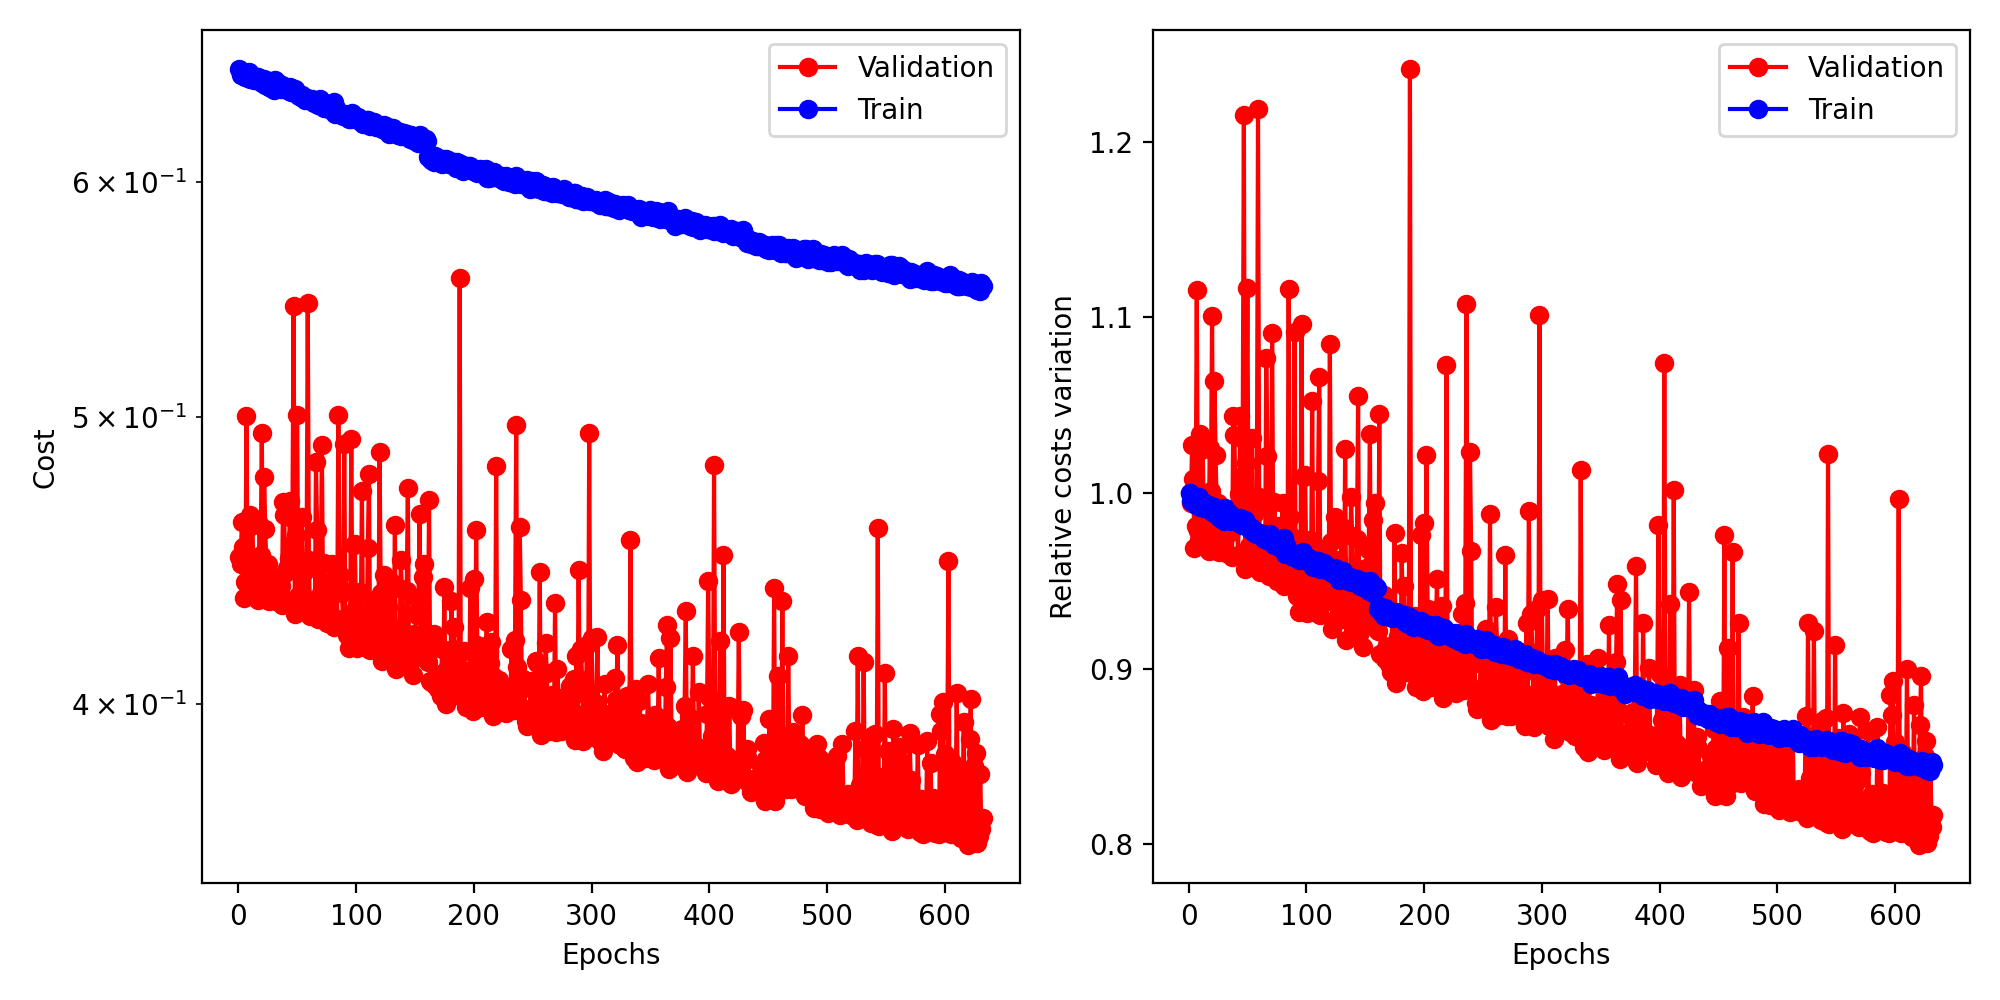

In [7]:
dual_train_plots_tracks_to_KDE(epochs,
                               costs, vals,
                               costs/costs[0], vals/vals[0])
plt.tight_layout()
plt.savefig(str('tracks_to_KDE_DDplus_loss_Ba_iter19-26_floatAll.png'))

In [12]:
valsperbin = 20
nbins = math.floor(len(costs)/valsperbin)+1
epochs_av = []
costs_av  = []
vals_av   = []
for i in range(nbins):
    bin_lo = i*valsperbin
    bin_hi = (i+1)*valsperbin
    
    epochs_av.append(sum(epochs[bin_lo:bin_hi])/len(epochs[bin_lo:bin_hi]))
    costs_av.append(sum(costs[bin_lo:bin_hi])/len(costs[bin_lo:bin_hi]))
    vals_av.append(sum(vals[bin_lo:bin_hi])/len(vals[bin_lo:bin_hi]))
    #print(epochs_av)
    #print(costs_av)
    #print(vals_av)    

<IPython.core.display.Javascript object>


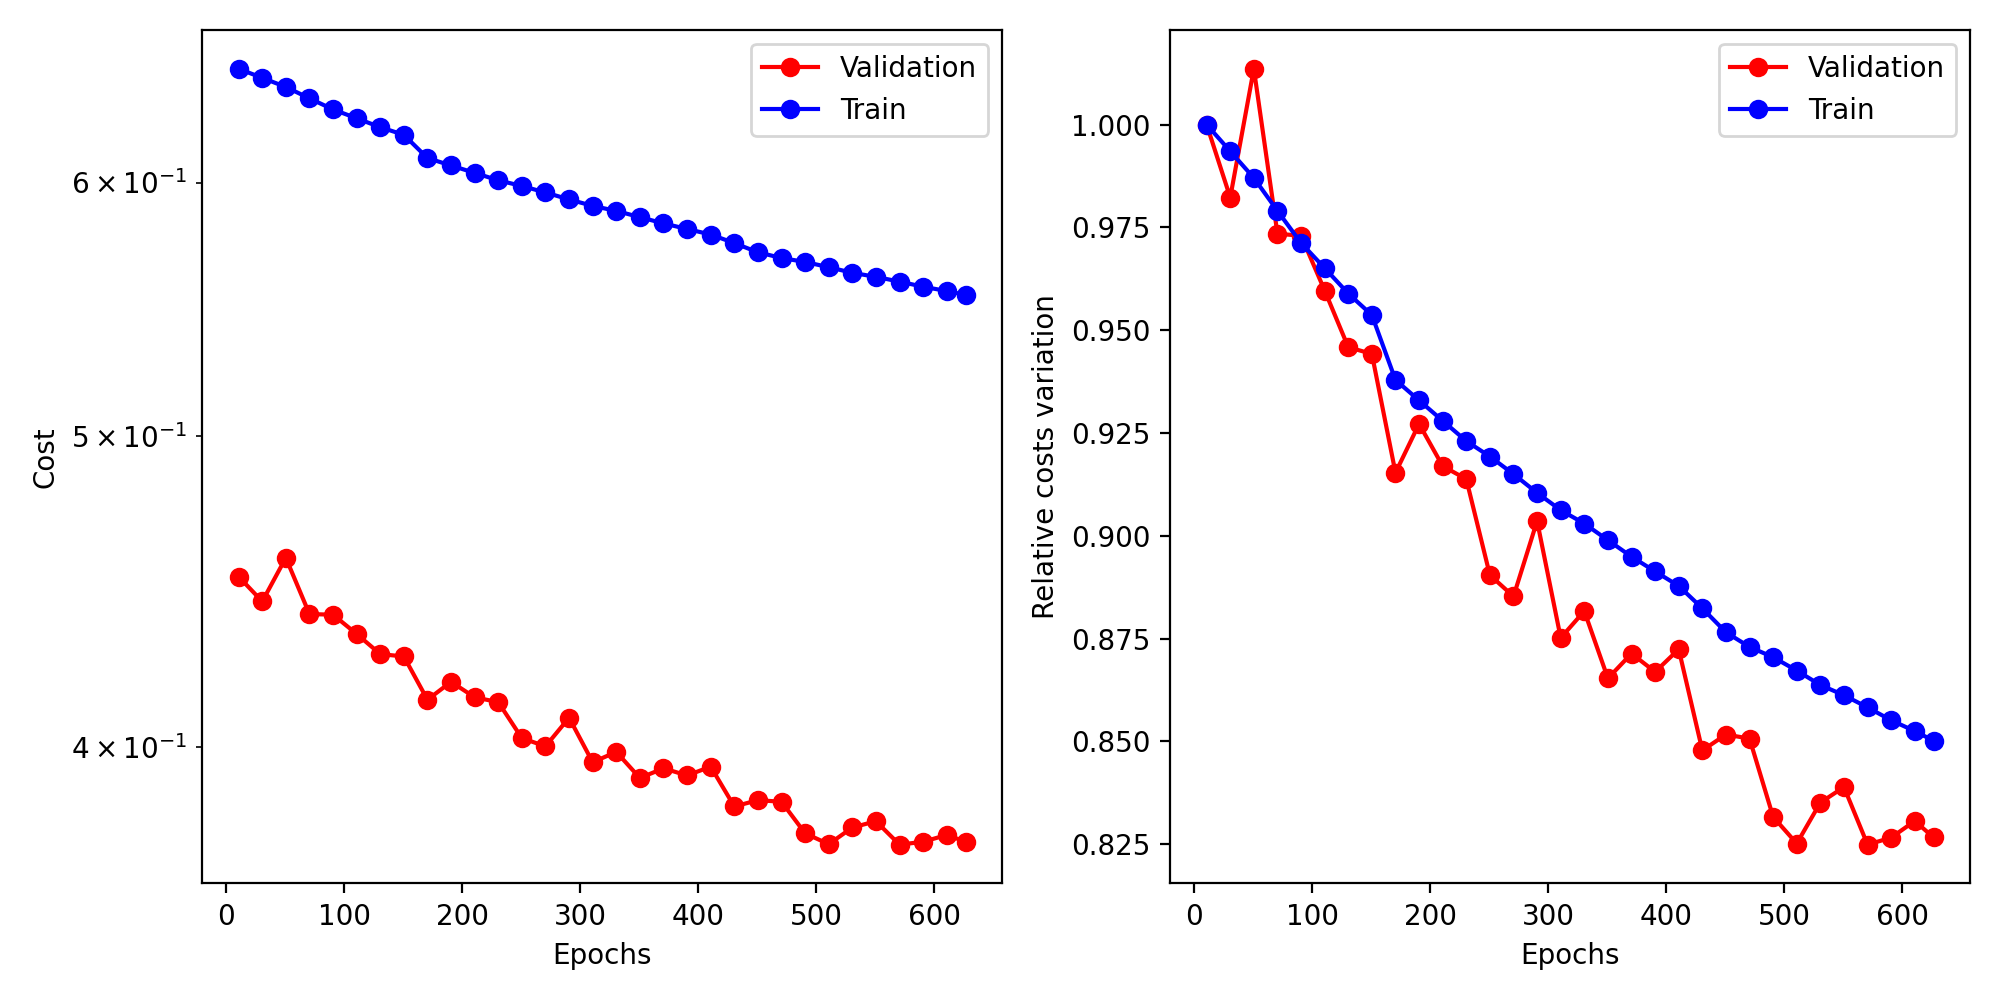

In [13]:
dual_train_plots_tracks_to_KDE(epochs_av,
                               costs_av, vals_av,
                               costs_av/costs_av[0], vals_av/vals_av[0])
plt.tight_layout()
plt.savefig(str('tracks_to_KDE_DDplus_loss_Ba_iter19-26_floatAll_averaged.png'))